In [482]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  TIP: 1. Research and import desired feature selection methods from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
#       2. For k-fold cross validation, consider https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
#                                         and/or https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
#       3. Research and import desired classification algorithms from https://scikit-learn.org/stable/supervised_learning.html
#       4. Research and import desired clustering algorithms from https://scikit-learn.org/stable/modules/clustering.html

# Instructions

For each question, a rough outline has been provided to help you get started under "Part 1.x.x: Work". Feel free to either follow the outline or use your own method for solving the problem. In either case, however, please make sure to include your work in these sections and fill in your answer in the cell titled "Part 1.x.x: Answer".

**Embedding Images in the Notebook**

To upload an image in a markdown cell in Jupyter Notebook:
1. Go to the menu bar and select Edit -> Insert Image.

2. Select image from your disk and upload.

3. Press Ctrl+Enter or Shift+Enter.

This will make the image as part of the notebook and you don't need to upload it in the directory

**Export Jupyter Notebooks**  
In your local computer, open the notebook you would like to export and navigate to 'File' at the top menu bar. By clickling 'File', you can find 'Download as' in the drop-down menu. Select the format you want to export the notebook as: either directly as a pdf, or if you download it as an html file, use a website like [html2pdf.com](https://html2pdf.com) to convert it to a pdf file for submission on Gradescope.

Colab does not seem to support exporting their notebooks to other formats, so if you choose to use Colab, you will need to download the notebook as an .ipynb file before following the steps above on your local machine.

# Question 1

### Read Data

In [483]:
PATH_TO_Q1_DATA = 'data/HW2_Q1_DATA.csv'
df = pd.read_csv(PATH_TO_Q1_DATA)

### Data Exploration

In [484]:
pd.set_option('display.max_columns', None)  # show all columns with head()
df.head()

,4E-BP1,ADA,AREG,AXIN1,BACH1,BIRC2,BTN3A2,CASP-8,CCL11,CCL19,CCL20,CCL23,CCL25,CCL28,CCL3,CCL4,CD244,CD28,CD40,CD5,CD6,CD83,CD8A,CDCP1,CDSN,CKAP4,CLEC4A,CLEC4C,CLEC4D,CLEC4G,CLEC7A,CNTNAP2,CSF-1,CST5,CX3CL1,CXADR,CXCL1,CXCL10,CXCL11,CXCL5,CXCL6,CXCL9,DCBLD2,DCTN1,DFFA,DNER,DPP10,EDAR,EIF4G1,EIF5A,EN-RAGE,FAM3B,FCRL6,FGF-19,FGF-21,Flt3L,GLB1,HCLS1,HEXIM1,HGF,HNMT,HSD11B1,IFN-gamma,IFNLR1,IL-10RA,IL-10RB,IL-12B,IL-17A,IL-17C,IL-18R1,IL-20RA,IL18,IL5,IL6,IL7,IL8,IRAK1,ITGA11,ITGA6,ITGB6,ITM2A,JUN,KLRD1,KRT19,LAG3,LAMP3,LAP TGF-beta-1,LIF-R,LILRB4,LY75,MASP1,MCP-1,MCP-2,MCP-4,MILR1,MMP-1,MMP-10,NCR1,NT-3,NTF4,OPG,OSM,PADI2,PD-L1,PIK3AP1,PPP1R9B,PRDX1,PRDX3,PRDX5,PSIP1,PTH1R,SCF,SH2D1A,SIRT2,SIT1,SLAMF1,SPRY2,SRPK2,STAMBP,STC1,TGF-alpha,TNF,TNFB,TNFRSF9,TNFSF14,TRAIL,TRANCE,TREM1,TRIM21,TWEAK,uPA,VEGFA,ZBTB16,Condition
0,27.718344,5.734644,13.165561,6.770850,0.000000,9.756987,0.000000,6.161444,0.000000,3.545201,0.000000,8.817527,7.508032,2.422742,0.000000,6.843969,18.773615,0.000000,18.730868,7.455245,26.659559,4.189390,1.076872,0.000000,0.000000,0.000000,11.826296,7.788437,0.000000,16.220314,1.109837,10.874609,5.293797,9.480353,3.203696,6.252064,0.000000,26.693942,0.000000,0.000000,7.368058,13.041884,0.000000,9.637007,0.000000,13.397451,3.405191,1.438115,0.000000,0.779473,0.000000,3.286780,4.291350,4.174334,0.000000,8.912544,0.000000,15.399080,17.348777,11.560710,0.000000,0.000000,0.815476,5.170512,4.020843,0.000000,0.000000,2.436370,0.000000,0.000000,0.000000,1.622146,4.472475,0.000000,0.000000,0.000000,8.039560,15.033599,12.192460,2.470746,13.304297,7.517567,0.000000,7.864877,4.191008,3.132020,8.541414,0.000000,9.163430,1.620337,0.000000,0.000000,0.000000,0.000000,0.000000,28.856916,9.504446,0.000000,0.000000,3.975596,16.192791,0.000000,0.000000,0.000000,0.985249,11.178848,15.181206,14.145702,16.986303,8.658794,7.202860,0.964152,2.125859,3.510396,15.197014,0.000000,0.000000,0.000000,6.309584,8.302339,12.000191,0.000000,0.998187,17.015074,0.000000,0.000000,0.000000,0.000000,10.462921,8.162390,3.209589,0.0,7.846367,CoV2
1,0.000000,13.791418,5.884233,0.396271,12.521125,0.000000,7.558042,4.814161,0.000000,0.000000,0.555607,10.962094,0.000000,2.648440,0.000000,0.000000,7.966805,2.731494,0.699221,11.196644,5.726753,6.832898,10.350866,0.239732,6.455786,4.033267,0.000000,0.000000,18.942073,3.111585,33.275970,3.360276,6.135610,0.000000,0.000000,0.000000,1.859586,6.974876,0.000000,16.929481,0.000000,13.068265,5.977234,19.969867,14.074089,4.800421,0.000000,3.175309,5.423078,43.495684,1.933688,0.000000,8.305734,0.000000,31.627888,2.767051,2.895586,15.693953,7.802739,0.000000,0.000000,5.635262,32.458745,1.653591,11.295072,0.000000,7.852373,6.740466,5.331868,4.422822,0.000000,0.000000,0.841615,0.251800,6.471288,0.000000,2.305014,11.732910,5.069960,6.585386,9.957475,0.000000,0.237587,0.000000,1.785264,0.000000,7.199421,2.698841,0.267144,0.000000,9.372084,0.000000,7.774374,13.806183,0.000000,0.000000,4.643473,15.595458,0.000000,0.000000,10.105447,9.701070,1.397358,2.375529,0.000000,13.456537,0.000000,0.000000,7.482231,10.512135,6.418627,0.000000,15.694330,2.552504,20.129469,14.268805,15.909556,1.923489,0.000000,12.683408,3.810757,5.165126,12.456605,6.177402,5.582112,28.143195,8.333056,1.801868,2.697739,9.918408,1.576225,0.0,1.988058,CoV2
2,0.000000,0.000000,2.303576,14.225052,3.579328,0.000000,7.902642,0.000000,0.896923,0.000000,0.000000,6.829464,6.176597,36.725478,14.500758,2.852927,10.440139,0.000000,1.984527,12.205972,4.904689,6.295782,5.977952,0.000000,35.676186,21.463649,10.210970,0.000000,13.580720,6.555678,11.049189,7.134474,13.464460,0.000000,0.000000,0.000000,7.716326,21.698020,0.000000,0.000000,3.640113,17.448447,0.000000,7.834174,8.478314,3.700956,0.000000,0.000000,8.284261,1.611970,0.000000,4.126854,14.547810,0.465372,2.051328,12.058449,4.064884,0.000000,19.906368,19.271130,1.949508,0.000000,0.000000,0.000000,2.522496,0.000000,6.872648,2.216933,4.436103,7.143954,8.589794,14.503386,6.697591,22.231499,4.987172,17.674558,4.813506,7.469

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 134 entries, 4E-BP1 to Condition
dtypes: float64(133), object(1)
memory usage: 1.0+ MB


In [486]:
# Find categorical columns
list(set(df.columns)-set(df._get_numeric_data().columns))

['Condition']

In [487]:
# Check distribution of categories
df.Condition.value_counts()

CoV2        341
Kawasaki    333
MIS-C       326
Name: Condition, dtype: int64

<AxesSubplot:>

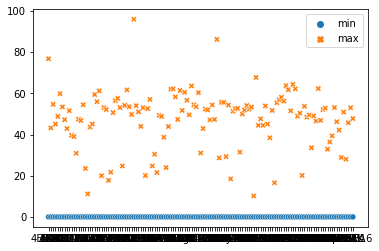

In [488]:
# Check min max range for each feature to see that we need to scale the data

def minMax(x):
    '''
    Source: https://stackoverflow.com/questions/29276301/max-and-min-value-for-each-colum-of-one-dataframe
    '''
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


# maxes before standardization
minmax_before = df.drop("Condition",axis=1).apply(minMax)
sns.scatterplot(data=minmax_before[:].T)

<AxesSubplot:>

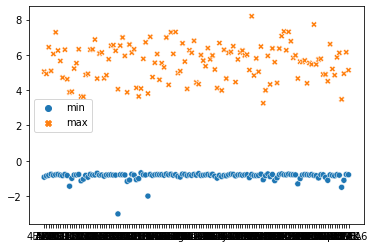

In [489]:
# standardize feature data
for col in df.drop("Condition",axis=1):
    df[col] = (df[col] - df[col].mean())/ df[col].std() # z =(x- μ)/σ

# maxes after standardization
minmax_after = df.drop("Condition",axis=1).apply(minMax)
sns.scatterplot(data=minmax_after[:].T)

### Define data object for use in other sections

In [490]:
class ImmunologicalData:
    """
    Contains separate data and target objects to make dataset more user friendly.
    Standardizes the data using zscore.
    """
    
    def __init__(self, as_frame):
        self.data = None
        self.target = None
        self.feature_names = None
        self.frame = None
        
        if as_frame:
            df = pd.read_csv('data/HW2_Q1_DATA.csv')
            
            # standardize feature data
            for col in df.drop("Condition",axis=1):
                df[col] = (df[col] - df[col].mean())/ df[col].std() # z =(x- μ)/σ
            
            
            # hotcode categorical label
            def get_condition_num(condition):
                if condition == "CoV2":
                    return 1
                elif condition == "Kawasaki":
                    return 2
                elif condition == "MIS-C":
                    return 3
                else:
                    raise IllegalArgumentException("Condition not recognized.")
                    
            df["Condition_Num"]=df["Condition"].apply(get_condition_num) 

            
            # store as members of this object
            self.frame = df
            self.data = df.drop(["Condition", "Condition_Num"], axis=1)            
            self.target = df["Condition_Num"]           
            self.feature_names = list(df.columns)            

In [491]:
idata = ImmunologicalData(as_frame=True)
X = idata.data
y = idata.target

print(X.shape)
print(y.shape)

(1000, 133)
(1000,)


## Part 1.1: Filter-based Feature Selection

### Part 1.1.1: Work

In [492]:
# TODO: Apply a filter-based feature selection method of your choice using 10-fold cross validation 
#       and use the results to choose the top 20 features

# TIP: Scikit-learn provides implementations of many useful statistical measures.

#       Pearson’s Correlation Coefficient: f_regression()
#       ANOVA: f_classif()
#       Chi-Squared: chi2()
#       Mutual Information: mutual_info_classif() and mutual_info_regression()

#      Also, SciPy provides implementations of many more statistics, such as
#      Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).

### Score features using ANOVA with 10-fold cross validation
ANOVA assumes continuous values for data and categories for the target.

In [493]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate #?? not working
from sklearn.model_selection import KFold


# define DataFrame to store results
df_anova_results = pd.DataFrame(columns=['k','Feature','F_score','P_value']).astype(dtype= {'k':'int64','Feature':'object', 'F_score':'float64','P_value':'float64'})


kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # calculate f-scores and p-values for all 133 feature columns using ANOVA
    f_scores, p_values = f_classif(X_train,y_train)
     
    # add row of f-score and p-value to result DataFrame for each (Fold, Feature)
    for i, f_score in enumerate(f_scores):
        
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,f_score,p_value], index = df_anova_results.columns)
        df_anova_results = df_anova_results.append(new_row, ignore_index=True)

In [494]:
df_anova_results.head()

,k,Feature,F_score,P_value
0,1,4E-BP1,3.289869,0.037709
1,1,ADA,6.060085,0.002431
2,1,AREG,0.400093,0.670377
3,1,AXIN1,0.565612,0.568215
4,1,BACH1,3.071017,0.046862


(133, 3)


<AxesSubplot:>

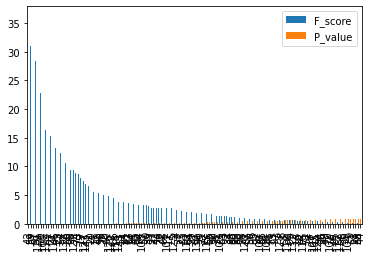

In [495]:
# calculate average f-score and p-value across all folds
df_anova_means=df_anova_results.drop("k",axis=1).groupby(["Feature"]).mean()
df_anova_means = df_anova_means.reset_index() # add feature to means DataFrame
print(df_anova_means.shape)

# visualize
df_anova_sorted=df_anova_means.sort_values(by="F_score", ascending=False)
df_anova_sorted.plot.bar()

### Select top 20 features from ANOVA results

In [496]:
# select 20 features with largest F-scores
df_anova_sorted.head(20)

list_anova_top_20 = list(df_anova_sorted["Feature"].head(20))
print(*list_anova_top_20, sep=", ")

DCBLD2, HGF, IL-17A, FAM3B, STC1, ITGB6, OPG, SCF, EDAR, CLEC4C, SIT1, DPP10, CDCP1, FGF-21, uPA, CLEC4A, HEXIM1, NT-3, TNF, IL7


### Score features using Pearson's correlation coefficient  with 10-fold cross validation

In [497]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression

# define DataFrame to store results
df_pearson_results = pd.DataFrame(columns=['k','Regressor','F_score','P_value']).astype(dtype= {'k':'int64','Regressor':'object', 'F_score':'float64','P_value':'float64'})

# cross validation
kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # calculate f-test for Pearson's correlation coefficient for this fold
    f_scores, p_values = f_regression(X_train, y_train, center=True)
      
    # add row to result DataFrame for each Fold,Feature,F-score
    for i, f_score in enumerate(f_scores):
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,f_score,p_value], index = df_pearson_results.columns)
        df_pearson_results = df_pearson_results.append(new_row, ignore_index=True)
        

In [498]:
df_pearson_results.head()

,k,Regressor,F_score,P_value
0,1,4E-BP1,0.142749,0.705653
1,1,ADA,1.224572,0.268762
2,1,AREG,0.259387,0.610667
3,1,AXIN1,1.118628,0.290498
4,1,BACH1,3.997947,0.045857


### Computer Average and Visualize results

<AxesSubplot:>

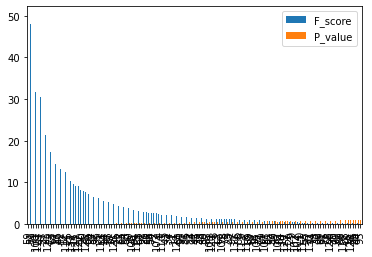

In [499]:
# compute average F_score and p_value across all training sets
# reset_index() to add Regressor column to DataFrame
df_pearson_means=df_pearson_results.drop("k",axis=1).groupby(["Regressor"]).mean().reset_index()
df_pearson_sorted=df_pearson_means.sort_values(by="F_score", ascending=False)
df_pearson_sorted.plot.bar()

### Select top 20 features

In [500]:
# select 20 regressors with largest F-scores
df_pearson_top_20=df_pearson_sorted.head(20)

list_pearson_top_20 = list(df_pearson_top_20["Regressor"])
print(*list_pearson_top_20, sep=", ")

HGF, FAM3B, ITGB6, OPG, STC1, EDAR, CLEC4C, CDCP1, TNF, IL6, IL-17A, CD5, DPP10, DCBLD2, CCL25, SIT1, CLEC4A, uPA, CCL4, TREM1


### Score features using Mutual Information with 10-fold cross validation

In [501]:
from sklearn.feature_selection import mutual_info_classif

# define DataFrame to store results
df_mi_results = pd.DataFrame(columns=['k','Feature','Mutual Information']).astype(dtype= {'k':'int64','Feature':'object', 'Mutual Information':'float64'})

kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # calculate f-scores and p-values for all 133 feature columns using ANOVA
    mi = mutual_info_classif(X_train,y_train)
        
    # add row of mutual information to result DataFrame for each (Fold, Feature)
    for i, mutual_info_score in enumerate(mi):
        
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,mutual_info_score], index = df_mi_results.columns)
        df_mi_results = df_mi_results.append(new_row, ignore_index=True)      

In [502]:
df_mi_results.head()

,k,Feature,Mutual Information
0,1,4E-BP1,0.024612
1,1,ADA,0.077316
2,1,AREG,0.000000
3,1,AXIN1,0.000000
4,1,BACH1,0.007373


(133, 2)


<AxesSubplot:>

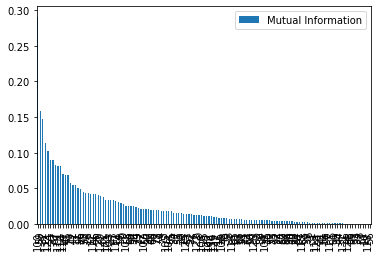

In [503]:
# calculate average f-score and p-value across all folds
df_mi_means=df_mi_results.drop("k",axis=1).groupby(["Feature"]).mean()
df_mi_means = df_mi_means.reset_index() # add feature to means DataFrame
print(df_mi_means.shape)

# visualize
df_mi_sorted=df_mi_means.sort_values(by="Mutual Information", ascending=False)
df_mi_sorted.plot.bar()

In [504]:
# select 20 features with largest Mutual Information scores
df_mi_sorted.head(20)

list_mi_top_20 = list(df_mi_sorted["Feature"].head(20))
print(*list_mi_top_20, sep=", ")

OPG, HGF, CSF-1, uPA, TNFRSF9, FAM3B, CXCL10, IL-17A, STC1, PTH1R, SIT1, EDAR, DNER, CD5, DCBLD2, ADA, CCL23, MMP-10, ITGB6, MMP-1


## Part 1.1.1: Answer

List the top 20 features you found: 

**Features using Mutual Information: OPG, HGF, CSF-1, uPA, TNFRSF9, FAM3B, IL-17A, CXCL10, PTH1R, STC1, EDAR, DNER, SIT1, CD5, ADA, DCBLD2, MMP-10, CCL23, ITGB6, MMP-1** 

## Part 1.1.2: Work

In [37]:
# TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.1.1

# TIP: 1. Pandas has a correlation functionality for dataframes
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#      2. Seaborn has a heatmap functionality
#         https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Heatmap from Mutual Information Results

<AxesSubplot:>

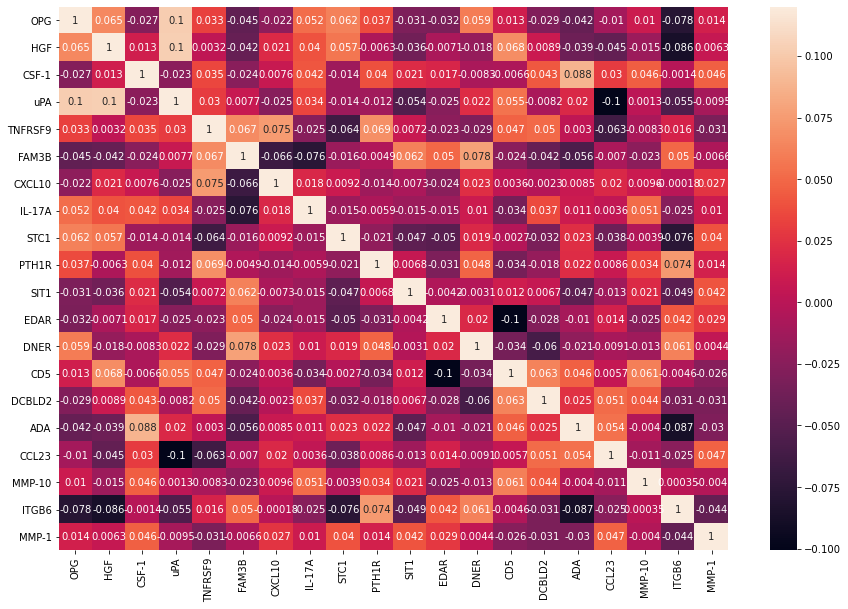

In [505]:
# select top 20 features
df_mi_top_20_features=X.loc[:][list_mi_top_20]

# heatmap
plt.figure(figsize=(15,10))
mi_top_20_cor=df_mi_top_20_features.corr(method='pearson')
sns.heatmap(mi_top_20_cor,annot=True,vmax=0.12)

### Define method to calculate average heatmap value

In [506]:
# calculate average value of heatmap
def calc_heatmap_average(df, include_diagonal):
    arr = df.to_numpy()
    size = df.shape[0]
    
    total=0
    num_entries=0
    
    # sum all cells
    for i in range(0,size):
        for j in range (0,size):
            if i == j and include_diagonal:
                total += arr[i][j]
                num_entries = num_entries + 1
            elif i != j:
                total += arr[i][j]
                num_entries = num_entries + 1
    
    return total / num_entries

In [509]:
print("Mutual Information averages")
print(calc_heatmap_average(mi_top_20_cor,True))

Mutual Information averages
0.05162466818234097


## Part 1.1.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? 

**For the Mutual Information heatmap, average was 0.0516 (diagonal included).**

## Part 1.1.3: Work

In [77]:
# TODO: Train a classifier using your top 1, top 2, ..., top 20 features from part 1.1.1
#       and plot the 10-fold cross-validated accuracy as a function of the number of features

# TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#      2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

### Define SVM classifier

In [46]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def train_svm_classifier(X,y,k):
    
    # get splits
    kfold = KFold(n_splits=k, shuffle=False)
    
    # define SVM model
    classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    
    # perform cross-validation
    scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)

    # return the average
    return np.average(scores)

### Train classifier using subsets of top 20 features of Mutual Information and 10-fold cross validation

In [512]:
%%time

# list to store results
top_20_svm_results = list()

# select 1 to 20 features from top 20
for i in range(1,21):
    
    # create dataframe with only those features
    subset=list_mi_top_20[:i]
    X_subset=idata.data.loc[:][subset]
    
    # get average score from cross validation
    avg = train_svm_classifier(X_subset, y, k=10)

    # store result
    top_20_svm_results.append([i,avg])

CPU times: user 311 ms, sys: 28 ms, total: 339 ms
Wall time: 1.75 s


### Visualize training results

<AxesSubplot:xlabel='number_of_features', ylabel='accuracy'>

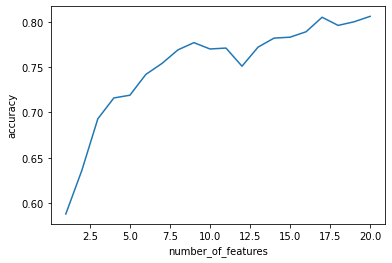

In [513]:
df_top_20_svm_results = pd.DataFrame(data=top_20_svm_results, columns=['number_of_features','accuracy'])

sns.lineplot(data=df_top_20_svm_results, x="number_of_features", y="accuracy")

## Part 1.1.3: Answer

**Include the plot as the output of one of the above cells or embed it as an image in this cell**

## Part 1.1.4: Work

In [81]:
# TODO: 1. Devise a method for determining a threshold that can be used to separate
#          truly relevant features from those that are spurious
#       2. Apply this method to the data to obtain a new set of features
#       3. Re-train a classifier with the new features using 10-fold cross validation

### Define Permutation Method to randomize labels

In [168]:
def rearrange_labels(df,label_col):
    '''
    Rearranges the labels for each row in a given label column for a given DataFrame, then returns a DataFrame of the rearranged column.
    '''
    # name for rearranged column to make it easier to append to the original dataframe
    col_name = label_col + "_Rearranged"
    
    # selecting only the label column build new DataFrame with labels randomly rearranged
    df_label_only = pd.DataFrame(df[label_col]).sample(frac=1).rename(columns={label_col: col_name})
    
    # update index to reflect reordering to prevent use of original ordering when concatenating with original DataFrame
    df_label_only.reset_index(inplace=True, drop=True)  
    
    # count of the quantity of each label to ensure same quantity appears after rearrangement
    dict_before = dict(df[label_col].value_counts())
    dict_after = dict(df_label_only[col_name].value_counts())
    if dict_before != dict_after:
        raise ValueError("Label counts do not match before and after rearrangement.", dict_before, dict_after)
        
    return df_label_only

In [177]:
# test of method
df_rearrange_test = pd.read_csv("data/HW2_Q1_Data_sample.csv")
print(df_rearrange_test["Condition"].value_counts(),"\n")
df_rearrange_testresult = pd.concat([df_rearrange_test, rearrange_labels(df_rearrange_test, "Condition")],axis=1)
print(df_rearrange_testresult["Condition_Rearranged"].value_counts(),"\n")
df_rearrange_testresult.loc[:][["Condition", "Condition_Rearranged"]].head(20)

CoV2        10
MIS-C        5
Kawasaki     4
Name: Condition, dtype: int64 

CoV2        10
MIS-C        5
Kawasaki     4
Name: Condition_Rearranged, dtype: int64 



,Condition,Condition_Rearranged
0,CoV2,Kawasaki
1,CoV2,CoV2
2,CoV2,CoV2
3,Kawasaki,Kawasaki
4,MIS-C,CoV2
5,CoV2,MIS-C
6,CoV2,CoV2
7,Kawasaki,CoV2
8,CoV2,Kawasaki
9,MIS-C,CoV2


### Define Mutual Information method for repeated iterations

In [216]:
def run_mutual_information(X,y,k):
    '''Runs mutual information for given data (X) and target (y) using k-fold cross validation,
    then returns DataFrame of results.'''

    # define DataFrame to store results
    df_results = pd.DataFrame(columns=['k','Feature','Mutual Information']).astype(dtype= {'k':'int64','Feature':'object', 'Mutual Information':'float64'})

    kf=KFold(n_splits=k, shuffle=False)  
    for k, (train, test) in enumerate(kf.split(X, y)):

        # get training rows for this fold
        X_train = X.iloc[train] 
        y_train = y.iloc[train]

        # calculate f-scores and p-values for all 133 feature columns using ANOVA
        mi = mutual_info_classif(X_train,y_train)

        # add row of mutual information to result DataFrame for each (Fold, Feature)
        for i, mutual_info_score in enumerate(mi):

            col_name = idata.feature_names[i]
            p_value = p_values[i]
            new_row = pd.Series([k+1,col_name,mutual_info_score], index = df_results.columns)
            df_results = df_results.append(new_row, ignore_index=True) 
            
    # calculate average f-score and p-value across all folds
    df_means = df_results.drop("k",axis=1).groupby(["Feature"]).mean()
    df_means = df_means.reset_index() # add feature to means DataFrame
    return df_means

### Run Mutual Information for each of p label permutations

In [207]:
# prepare data
df_original_labels = pd.DataFrame(idata.target)

In [257]:
%%time
# 16 min

# create DataFrame to hold all results
df_permutation_results = pd.DataFrame(columns=['Feature','Mutual Information','Permutation', ]).astype(dtype= {'Feature':'object', 'Mutual Information':'float64','Permutation':'int64'})

num_permutations = 100
for p in range(0,num_permutations):
    
    # randomize labels and run mutual information for this permutation
    s_randomized_labels = rearrange_labels(df_original_labels, "Condition_Num")["Condition_Num_Rearranged"]  
    df_perm = run_mutual_information(X,s_randomized_labels,10)
    
    # label all rows in this permutation with permutation number
    df_perm["Permutation"]=p+1
    
    # append rows to permutation results
    df_permutation_results = df_permutation_results.append(df_perm, ignore_index=True) 

CPU times: user 16min 21s, sys: 3.72 s, total: 16min 25s
Wall time: 16min 26s


In [258]:
print(df_permutation_results.shape)
df_permutation_results.head()

(13300, 3)


,Feature,Mutual Information,Permutation
0,4E-BP1,0.020619,1
1,ADA,0.006063,1
2,AREG,0.005474,1
3,AXIN1,0.022632,1
4,BACH1,0.000387,1


### Study how to estimate p-value using permutation histogram

In [520]:
def estimate_p_value(feature, feature_mi, perms, num_permutations):
    '''Calculates an estimated p-value of a given mutual information 
    value for a given feature using histogram of permutations.'''

    # calculate the number of mutual information values generated by random permutation which exceed the correct mi
    num_greater = perms[(perms["Feature"] == feature) & (perms["Mutual Information"] > feature_mi)].shape[0]

    return num_greater/num_permutations

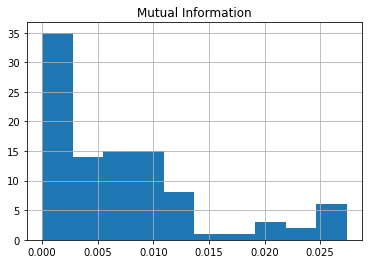

In [521]:
# histogram of 4E-BP1
hist = df_permutation_results[df_permutation_results["Feature"] == '4E-BP1'].drop("Permutation",axis=1).hist(bins=10)

In [522]:
test_mi = df_mi_means[df_mi_means["Feature"] == "4E-BP1"].iloc[0]["Mutual Information"]
test_mi

0.027241789406752592

In [523]:
estimate_p_value("4E-BP1", test_mi,df_permutation_results,num_permutations)

0.02

### Estimate p-value for each Mutual Information score from Section 1.1.1 using permutations

In [524]:
# apply estimate function to a copy of the mutual information dataframe
df_2 = df_mi_means.copy()
df_2["P_value"]=df_2.apply(lambda x : estimate_p_value(x["Feature"],x["Mutual Information"],df_permutation_results,num_permutations), axis=1)



In [471]:
df_2.head()

,Feature,Mutual Information,P_value
0,4E-BP1,0.026443,0.03
1,ADA,0.056328,0.00
2,AREG,0.006268,0.37
3,AXIN1,0.007783,0.37
4,BACH1,0.014443,0.18


### Remove any features with p > 0.05 based on Mutual Information

In [525]:
df_relevant_features_only = df_2[df_2["P_value"]  < 0.05]
df_relevant_features_only.shape

(37, 3)

In [526]:
list_mi_top_threshold_features = list(df_relevant_features_only["Feature"])
print(*list_mi_top_threshold_features, sep=", ")

4E-BP1, ADA, CCL23, CCL25, CCL3, CD5, CD6, CLEC4A, CLEC4C, CSF-1, CXCL10, DCBLD2, DCTN1, DNER, DPP10, EDAR, FAM3B, FGF-21, HEXIM1, HGF, IL-17A, IL7, ITGB6, KLRD1, MMP-1, MMP-10, OPG, PD-L1, PTH1R, SCF, SH2D1A, SIT1, STC1, TNF, TNFRSF9, TREM1, uPA


### Train SVM classifier using relevant features and 10-fold cross validation

In [528]:
# create dataframe with top 20 features
X_relevant=idata.data.loc[:][list_mi_top_threshold_features]
print(X_relevant.shape)

# # get average score from cross validation
train_svm_classifier(X_relevant, y, k=10)

(1000, 37)


0.749

## Part 1.1.4: Answer

Briefly describe the method you devised for determinining a threshold for truly relevant features: 

**Create 100 permutations of the labels for the dataset. For each permutation, shuffle the labels but leave the remainder of the data intact. The number of each label before shuffling should match the number after shuffling. Calculate mutual information (MI) for all features for each permutation.**

**For each feature in the original dataset, estimate the p-value of its correlation with the true label by using a histogram of the permutation results. The calculation of the p-value is as follows:**

- **Determine the number *r* of permutation results which have a MI value greater than the original MI value.**
- **Divide *r* by the total number of permutation results (100) to calculate a p-value.**

**Remove all features from the dataset which have statistical significance p > 0.05. Those removed features are considered to have spurious correlation.**

**Shuffling the labels should have removed any correlation between the features and the labels. Any correlation found in a random dataset therefore represents noise present in a dataset of this size and complexity and in the method for calculating mutual information. The estimated p-value represents the probability that the specific magnitude found for the original MI value occurred by chance. If we find that there is less than 5% chance that the specific value found by Mutual Information for a given feature was achieved by chance, we can conclude that the feature is relevant.**


List the new set of features obtained from applying your method to the data: **4E-BP1, ADA, CCL23, CCL25, CCL3, CD5, CD6, CLEC4A, CLEC4C, CSF-1, CXCL10, DCBLD2, DCTN1, DNER, DPP10, EDAR, FAM3B, FGF-21, HEXIM1, HGF, IL-17A, IL7, ITGB6, KLRD1, MMP-1, MMP-10, OPG, PD-L1, PTH1R, SCF, SH2D1A, SIT1, STC1, TNF, TNFRSF9, TREM1, uPA**

What was the 10-fold cross-validated accuracy of the classifier trained with these new features? **0.749**

## Part 1.1.5: Work

In [ ]:
# TODO: 1. Use a clustering algorithm of your choice to cluster
#          the features you found in part 1.1.4 into 10 clusters
#       2. Choose a representative feature from each cluster and
#          train a classifier with these features using 10-fold
#          cross validation

### Cluster variables using Kmeans

In [529]:
from sklearn.cluster import KMeans

# transpose data to cluster by feature
df_features=X.loc[:][list_mi_top_threshold_features].T

# kmeans clustering with k=10
kmeans = KMeans(n_clusters=10).fit(df_features)
labels = kmeans.labels_

# add features as index
s_labels = pd.Series(labels)
s_labels.index = X.loc[:][list_mi_top_threshold_features].columns
s_labels

4E-BP1     5
ADA        1
CCL23      5
CCL25      7
CCL3       5
CD5        9
CD6        2
CLEC4A     8
CLEC4C     8
CSF-1      1
CXCL10     9
DCBLD2     5
DCTN1      6
DNER       4
DPP10      0
EDAR       8
FAM3B      4
FGF-21     5
HEXIM1     5
HGF        2
IL-17A     6
IL7        5
ITGB6      7
KLRD1      9
MMP-1      1
MMP-10     9
OPG        2
PD-L1      1
PTH1R      7
SCF        3
SH2D1A     2
SIT1       4
STC1       3
TNF        9
TNFRSF9    0
TREM1      3
uPA        2
dtype: int32

### Select representative feature from each cluster

In [533]:
# select an arbitrary feature from the options in a single cluster
s_labels.sort_values(ascending=False, inplace=True)
s_representative_features = s_labels.drop_duplicates()
print(s_representative_features)
print()

representative_features = list(s_representative_features.index)
print(*representatitive_features, sep=", ")

KLRD1     9
CLEC4C    8
ITGB6     7
DCTN1     6
CCL23     5
FAM3B     4
TREM1     3
SH2D1A    2
ADA       1
DPP10     0
dtype: int32

KLRD1, CLEC4C, PTH1R, DCTN1, FGF-21, FAM3B, TREM1, SH2D1A, CSF-1, DPP10


### Train SVM classifier with representative features using 10-fold cross validation

In [532]:
# get data
X = idata.data.loc[:][representative_features]
y=idata.target
print(X.shape)

# get average score from cross validation
train_svm_classifier(X, y, k=10)

(1000, 10)


0.483

## Part 1.1.5: Answer

List the representative features you chose from the 10 clusters: **KLRD1, CLEC4C, PTH1R, DCTN1, FGF-21, FAM3B, TREM1, SH2D1A, CSF-1, DPP10**

What was the 10-fold cross-validated accuracy of the classifier trained with these representative features? **0.483**

# Part 1.2: Wrapper-based Feature Selection

## Part 1.2.1: Work

In [ ]:
# TODO: Apply a wrapper-based feature selection method of your choice to the data

# TIP: 1. Scikit learn has an implementation of recursive feature elimination (RFE)
#         https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
#      2. The mlxtend library has very thorough documentation and great options for sequential and exhaustive feature selection
#         http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
#         http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

### Data

In [13]:
X = idata.data
y = idata.target
print(X.shape, y.shape)

(1000, 133) (1000,)


### Test with RFE wrapper model
Based on source material from https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [18]:
%%time 
# 20 min runtime
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

CPU times: user 20min 10s, sys: 7.6 s, total: 20min 17s
Wall time: 10min 47s


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

Optimal number of features : 23


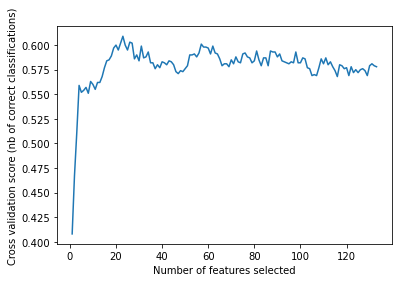

In [19]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Perform feature selection with RFE using 10-fold cross validation

In [22]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

def train_wrapper_model(X,y):
    svc = SVC(kernel="linear")
    rfe = RFE(estimator=svc, step=1)
    selector = rfe.fit(X,y)
    return selector

def add_wrapper_results_row(df, k, support):
    
    # define name for this fold's column
    col_name = "Support_Fold_" + str(k+1)
     
    # build DataFrame of this fold's results
    new_support = pd.DataFrame(support, columns=["Support_Bool"])
    new_support["Support"]=new_support["Support_Bool"].astype(int) # convert boolean to int

    # add this fold's support to the growing DataFrame
    df[col_name]=new_support["Support"]

In [27]:
%%time
#14 min runtime

# build DataFrame to capture all fold results
df_wrapper_results = pd.DataFrame(data=idata.data.columns, columns=["Feature"])


kf=StratifiedKFold(10)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    print(X_train.shape, y_train.shape)

    # perform selection
    selector = train_wrapper_model(X_train,y_train)
    
    # add column to results
    add_wrapper_results_row(df_wrapper_results,k,selector.support_)  

(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
CPU times: user 14min 40s, sys: 5.37 s, total: 14min 45s
Wall time: 8min 15s


### Determine how many folds each feature is in

In [29]:
# sum the number of times feature is selected for all folds and store result in a Summary column
df_wrapper_results["Summary"]=df_wrapper_results.drop("Feature",axis=1).sum(axis=1)
df_wrapper_results.head()

,Feature,Support_Fold_1,Support_Fold_2,Support_Fold_3,Support_Fold_4,Support_Fold_5,Support_Fold_6,Support_Fold_7,Support_Fold_8,Support_Fold_9,Support_Fold_10,Summary
0,4E-BP1,0,0,0,0,0,0,0,0,0,0,0
1,ADA,1,0,1,0,0,0,0,0,0,0,2
2,AREG,0,0,0,1,0,0,0,0,0,0,1
3,AXIN1,0,0,0,0,0,0,0,0,0,0,0
4,BACH1,1,1,1,0,0,1,0,0,0,0,4


In [30]:
# select only features that are present in 8 or more folds (out of 10)
df_8_or_more = df_wrapper_results[df_wrapper_results["Summary"]>7][["Feature","Summary"]]
df_8_or_more

,Feature,Summary
5,BIRC2,10
11,CCL23,10
12,CCL25,10
13,CCL28,10
14,CCL3,9
20,CD6,9
23,CDCP1,10
26,CLEC4A,9
27,CLEC4C,10
37,CXCL10,10


In [32]:
# get a list
list_top_rfe_features=list(df_8_or_more["Feature"])
print(len(list_top_rfe_features))
print(*list_top_rfe_features, sep=", ")

44
BIRC2, CCL23, CCL25, CCL28, CCL3, CD6, CDCP1, CLEC4A, CLEC4C, CXCL10, CXCL9, DCBLD2, DCTN1, DPP10, EDAR, EIF4G1, FAM3B, FGF-19, FGF-21, HGF, IL-12B, IL-17A, IL6, IL7, IL8, ITGB6, LY75, MCP-1, MMP-10, NT-3, OPG, OSM, PD-L1, SCF, SIT1, STC1, TNF, TNFRSF9, TRANCE, TREM1, TRIM21, TWEAK, uPA, VEGFA


## Part 1.2.1: Answer

List the top features selected in at least 8 out of 10 folds: **BIRC2, CCL23, CCL25, CCL28, CCL3, CD6, CDCP1, CLEC4A, CLEC4C, CXCL10, CXCL9, DCBLD2, DCTN1, DPP10, EDAR, EIF4G1, FAM3B, FGF-19, FGF-21, HGF, IL-12B, IL-17A, IL6, IL7, IL8, ITGB6, LY75, MCP-1, MMP-10, NT-3, OPG, OSM, PD-L1, SCF, SIT1, STC1, TNF, TNFRSF9, TRANCE, TREM1, TRIM21, TWEAK, uPA, VEGFA**

## Part 1.2.2: Work


In [33]:
# TODO: Create and plot a correlation heat map using your features from part 1.2.1

# TIP: 1. Pandas has a correlation functionality for dataframes
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#      2. Seaborn has a heatmap functionality
#         https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Heatmap

<AxesSubplot:>

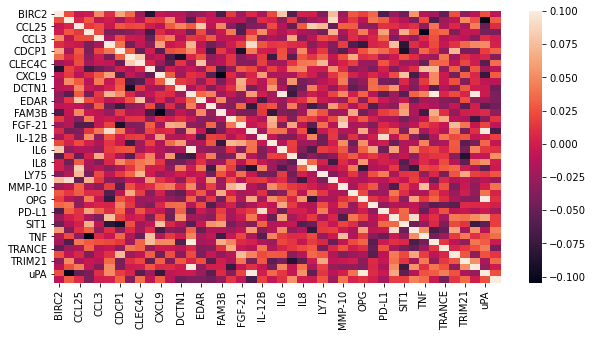

In [123]:
# select only those features from the data
df_rfe_top_features = X.loc[:][list_top_rfe_features]

# heatmap
plt.figure(figsize=(10,5))
top_rfe_cor=df_rfe_top_features.corr(method='pearson')
sns.heatmap(top_rfe_cor,vmax=0.1)

### Calculate Average Value of Heatmap

In [534]:
# calculate average value of heatmap
print("RFE heatmap averages")
print(calc_heatmap_average(top_rfe_cor,True))

RFE heatmap averages


NameError: name 'top_rfe_cor' is not defined

## Part 1.2.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **The average is 0.0217 (diagonals included)**.

## Part 1.2.3: Work

In [ ]:
# TODO: Train a classifier using your features from part 1.2.1 with 10-fold cross validation

# TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#      2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

### Train SVM classifier using rfe features and 10-fold cross validation

In [47]:
# create dataframe with only those features
X_rfe_svm = X.loc[:][list_top_rfe_features]
print(X_rfe_svm.shape)

# get average score from cross validation
train_svm_classifier(X_rfe_svm, y, k=10)

(1000, 44)


0.7370000000000001

## Part 1.2.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **0.737**

# Part 1.3: Embedded Feature Selection

## Part 1.3.1: Work

In [ ]:
# TODO: Apply an embedded feature selection method of your choice using 10-fold cross validation

# TIP: 1. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree 
#         and/or https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
#         for tree based methods
#      2. Check out the SelectFromModel functionality from 
#         https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html 

### Perform feature selection with RandomForestClassifier

In [111]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def train_embedded_model(X,y):
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    return sel.fit(X, y)

def add_embedded_results_row(df, k, support):
    
    # define name for this fold's column
    col_name = "Support_Fold_" + str(k+1)
     
    # build DataFrame of this fold's results
    new_support = pd.DataFrame(support, columns=["Support_Bool"])
    new_support["Support"]=new_support["Support_Bool"].astype(int) # convert boolean to int

    # add this fold's support to the growing DataFrame
    df[col_name]=new_support["Support"]

In [115]:
%%time 

# build DataFrame to capture all fold results
df_embedded_results = pd.DataFrame(data=idata.data.columns, columns=["Feature"])

kf=StratifiedKFold(10)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    print(X_train.shape, y_train.shape)

    # perform selection
    selector = train_embedded_model(X_train,y_train)
    
    # add column to results
    add_embedded_results_row(df_embedded_results,k,selector.get_support()) 

(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
(900, 133) (900,)
CPU times: user 4.82 s, sys: 39.1 ms, total: 4.85 s
Wall time: 4.88 s


### Determine how many folds each feature is in

In [116]:
df_embedded_results.head()

,Feature,Support_Fold_1,Support_Fold_2,Support_Fold_3,Support_Fold_4,Support_Fold_5,Support_Fold_6,Support_Fold_7,Support_Fold_8,Support_Fold_9,Support_Fold_10
0,4E-BP1,1,1,0,0,0,0,1,0,0,0
1,ADA,1,1,1,1,1,1,1,1,1,1
2,AREG,0,0,0,0,0,0,0,0,0,0
3,AXIN1,0,0,0,0,0,0,0,0,0,0
4,BACH1,0,0,0,0,0,0,0,0,0,0


In [117]:
# sum the number of times feature is selected for all folds and store result in a Summary column
df_embedded_results["Summary"]=df_embedded_results.drop("Feature",axis=1).sum(axis=1)
df_embedded_results.head()

,Feature,Support_Fold_1,Support_Fold_2,Support_Fold_3,Support_Fold_4,Support_Fold_5,Support_Fold_6,Support_Fold_7,Support_Fold_8,Support_Fold_9,Support_Fold_10,Summary
0,4E-BP1,1,1,0,0,0,0,1,0,0,0,3
1,ADA,1,1,1,1,1,1,1,1,1,1,10
2,AREG,0,0,0,0,0,0,0,0,0,0,0
3,AXIN1,0,0,0,0,0,0,0,0,0,0,0
4,BACH1,0,0,0,0,0,0,0,0,0,0,0


In [118]:
# select only features that are present in 8 or more folds (out of 10)
df_8_or_more_embedded = df_embedded_results[df_embedded_results["Summary"]>7][["Feature","Summary"]]
df_8_or_more_embedded

,Feature,Summary
1,ADA,10
11,CCL23,10
19,CD5,10
26,CLEC4A,10
32,CSF-1,10
37,CXCL10,10
42,DCBLD2,10
45,DNER,10
46,DPP10,10
47,EDAR,10


In [119]:
# get a list
list_top_embedded_features=list(df_8_or_more_embedded["Feature"])
print(len(list_top_embedded_features))
print(*list_top_embedded_features, sep=", ")

22
ADA, CCL23, CD5, CLEC4A, CSF-1, CXCL10, DCBLD2, DNER, DPP10, EDAR, FAM3B, HGF, IL-17A, ITGB6, MMP-10, OPG, PTH1R, SCF, SIT1, STC1, TNFRSF9, uPA


## Part 1.3.1: Answer

List the top features selected in at least 8 out of 10 folds: **ADA, CCL23, CD5, CLEC4A, CSF-1, CXCL10, DCBLD2, DNER, DPP10, EDAR, FAM3B, HGF, IL-17A, ITGB6, MMP-10, OPG, PTH1R, SCF, SIT1, STC1, TNFRSF9, uPA**

## Part 1.3.2: Work

In [120]:
# TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.3.1

# TIP: 1. Pandas has a correlation functionality for dataframes
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#      2. Seaborn has a heatmap functionality
#         https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Heatmap

<AxesSubplot:>

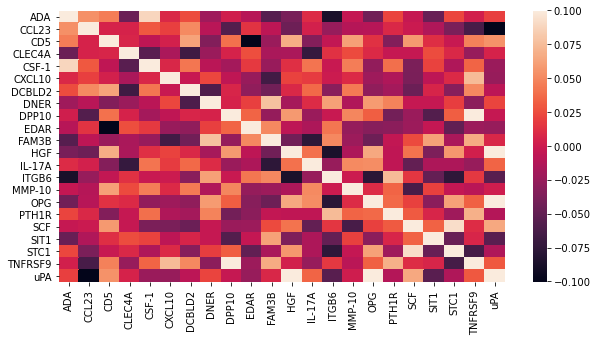

In [122]:
# select only those features from the data
df_embedded_top_features = X.loc[:][list_top_embedded_features]

# heatmap
plt.figure(figsize=(10,5))
top_embedded_cor=df_embedded_top_features.corr(method='pearson')
sns.heatmap(top_embedded_cor,vmax=0.1)

### Calculate Heatmap Average

In [124]:
# calculate average value of heatmap
print("Embedded heatmap averages")
print(calc_heatmap_average(top_embedded_cor,True))

Embedded heatmap averages
484
0.046526712201343634
462
0.0011232223061694803


## Part 1.3.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **Average is 0.0465 (diagonal included).**

## Part 1.3.3: Work

In [ ]:
'''
TODO: Train a classifier using your features from part 1.3.1 with 10-fold cross validation

TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
     2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
'''

In [ ]:
# create dataframe with only those features
X_rfe_svm = X.loc[:][list_top_rfe_features]
print(X_rfe_svm.shape)

# get average score from cross validation
train_svm_classifier(X_rfe_svm, y, k=10)

## Part 1.3.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **YOUR ANSWER HERE**